In [74]:
!pip install mplsoccer


In [8]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

In [118]:

df = pd.read_csv('UF_OU_xG1.csv')

In [119]:
(df.head(11))

,Unnamed: 0,team,xG,event,X,Y
0,0,Florida,0.15,Shot,93,34
1,1,OU,0.40,Goal,88,52
2,2,Florida,0.10,Shot,77,41
3,3,OU,0.10,Shot,80,40
4,4,Florida,0.10,Shot,72,43
5,5,Florida,0.10,Shot,80,54
6,6,OU,0.65,Shot,94,53
7,7,Florida,0.40,Shot,92,47
8,8,Florida,0.65,Shot,96,49
9,9,Florida,0.40,Shot,92,50


In [ ]:
shots = df[df['event'] == 'Shot']

florida_shots = shots[shots['team'] == 'Florida']
ou_shots = shots[shots['team'] == 'OU']

florida_total_shots = florida_shots.shape[0]
florida_total_goals = florida_shots[florida_shots['event'] == 'Goal'].shape[0]
florida_total_xG = florida_shots['xG'].sum()
florida_xG_per_shot = florida_total_xG / florida_total_shots if florida_total_shots > 0 else 0
florida_avg_distance = 120 - (florida_shots['X'] * 1.2).mean()

ou_total_shots = ou_shots.shape[0]
ou_total_goals = ou_shots[ou_shots['event'] == 'Goal'].shape[0]
ou_total_xG = ou_shots['xG'].sum()
ou_xG_per_shot = ou_total_xG / ou_total_shots if ou_total_shots > 0 else 0
ou_avg_distance = 120 - (ou_shots['X'] * 1.2).mean()

# Print stats
print(f"Florida Stats:")
print(f"Total Shots: {florida_total_shots}")
print(f"Total Goals: {florida_total_goals}")
print(f"Total xG: {florida_total_xG}")
print(f"xG per Shot: {florida_xG_per_shot}")
print(f"Average Distance: {florida_avg_distance}")
print()

print(f"Oklahoma Stats:")
print(f"Total Shots: {ou_total_shots}")
print(f"Total Goals: {ou_total_goals}")
print(f"Total xG: {ou_total_xG}")
print(f"xG per Shot: {ou_xG_per_shot}")
print(f"Average Distance: {ou_avg_distance}")
print()



Florida Stats:
Total Shots: 7
Total Goals: 0
Total xG: 1.9
xG per Shot: 0.2714285714285714
Average Distance: 16.799999999999997

Oklahoma Stats:
Total Shots: 3
Total Goals: 0
Total xG: 1.15
xG per Shot: 0.3833333333333333
Average Distance: 12.799999999999997



In [127]:
background_color='#0C0D0E'

import matplotlib.font_manager as font_manager
font_path = '/Users/evanbach/Downloads/Football_Analysis/fonts/Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

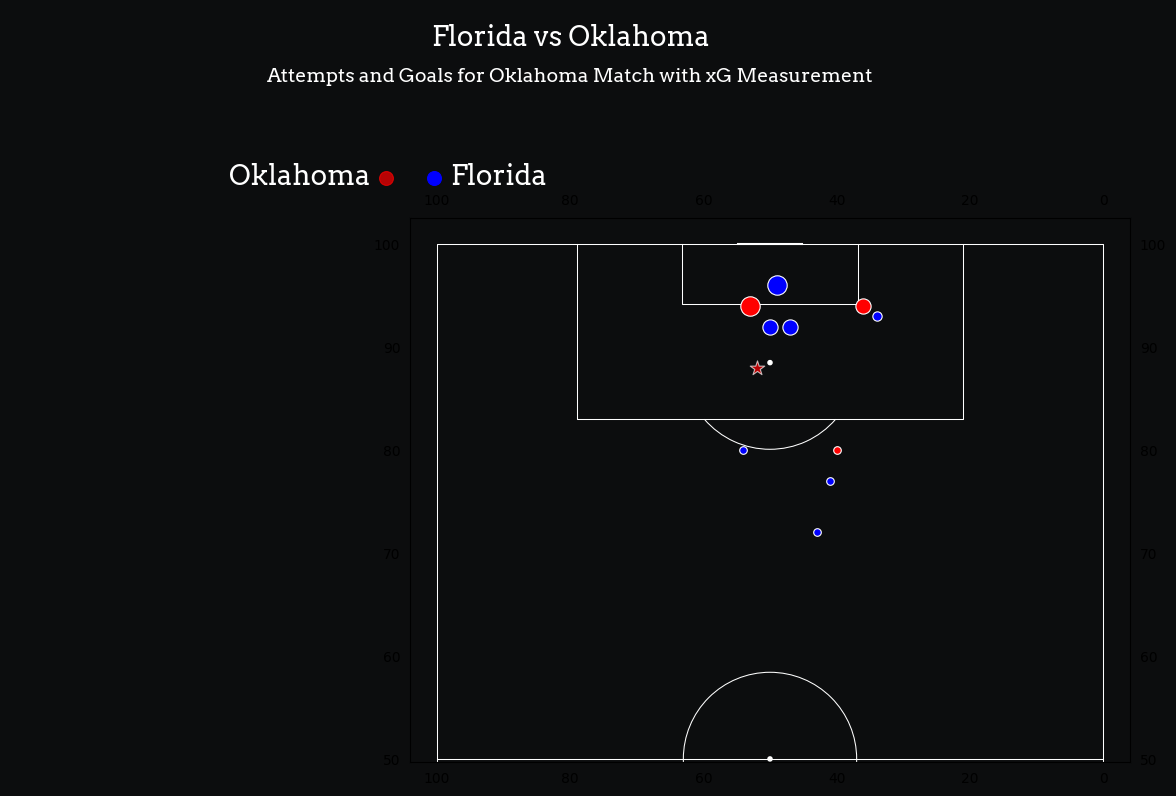

In [ ]:
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)



ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

ax1.text(
    x=0.7, 
    y=.85, 
    s='Florida vs Oklahoma', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='white', 
    ha='center'
)

ax1.text(
    x=0.7, 
    y=.7, 
    s=f'Attempts and Goals for Oklahoma Match with xG Measurement', 
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props, 
    color='white', 
    ha='center'
)

ax1.text(
    x=0.45, 
    y=0.27, 
    s=f'Oklahoma', 
    fontsize=20, 
    fontproperties=font_props, 
    color='white', 
    ha='right'
)
ax1.scatter(
    x=0.47, 
    y=0.3, 
    s=100, 
    color='red', 
    edgecolor='red', 
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53, 
    y=0.3, 
    s=100, 
    color='blue', 
    edgecolor='blue', 
    linewidth=.8
)

ax1.text(
    x=0.55, 
    y=0.27, 
    s=f'Florida', 
    fontsize=20, 
    fontproperties=font_props, 
    color='white', 
    ha='left'
)

ax1.set_axis_off()



ax2 = fig.add_axes([0.5, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch = VerticalPitch(
    pitch_type='opta', 
    half=True, 
    pitch_color=background_color, 
    pad_bottom=.5, 
    line_color='white',
    linewidth=.75,
    axis=True, 
    label=True)

pitch.draw(ax=ax2)


for x in df.to_dict(orient='records'):
    color = 'blue' if x['team'] == 'Florida' else 'red' if x['team'] == 'OU' else background_color
    
    # Plot goal as star marker
    if x['event'] == 'Goal':
        pitch.scatter(
            x['X'],  # X coordinate for shot
            x['Y'],  # Y coordinate for shot
            s=300 * x['xG'],  # Size based on xG value 
            color=color,  # Color based on team
            ax=ax2,  
            alpha=0.7,  # Transparency
            linewidth=0.8,  
            edgecolor='white',  
            marker='*'  # Star marker goal
        )
    else:
        # Plot normal shot as circular marker
        pitch.scatter(
            x['X'],  # X coordinate for shot
            x['Y'],  # Y coordinate for shot
            s=300 * x['xG'],  # Size based on 
            color=color,  # Color based on team
            ax=ax2,  # ax2
            alpha=1,  # Transparency 
            linewidth=0.8,  # Edge width
            edgecolor='white'  
        )



    
    



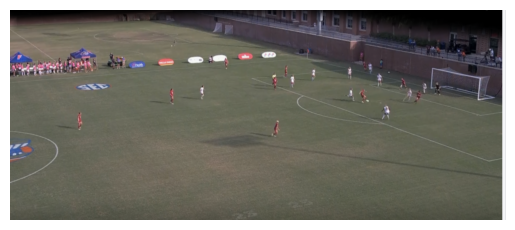

In [18]:

# Define path
image_path = os.path.join("../input_videos/Goal.png")
img = plt.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

## Goal Event Below